In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('bank-additional-full.csv',delimiter=';')


In [3]:
df = dataset.copy()

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
len(df[df['y']=='yes'])/len(df)*100

11.265417111780131

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
1,job,object,0,0.0,12,"[housemaid, services, admin., blue-collar, tec..."
2,marital,object,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,object,0,0.0,3,"[no, unknown, yes]"
5,housing,object,0,0.0,3,"[no, yes, unknown]"
6,loan,object,0,0.0,3,"[no, yes, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,object,0,0.0,5,"[mon, tue, wed, thu, fri]"


In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df[['marital','default','housing','loan']] #,'poutcome'

,marital,default,housing,loan
0,married,no,no,no
1,married,unknown,no,no
2,married,no,yes,no
3,married,no,no,no
4,married,no,no,yes
...,...,...,...,...
41183,married,no,yes,no
41184,married,no,no,no
41185,married,no,yes,no
41186,married,no,no,no


In [10]:
col_name = ['marital','default','housing','loan']

def fillNull(row, col_name):
    for i in col_name:
        if row[i] == 'unknown':
            row[i] = None 
     
    

In [11]:
def fillNull(row):
    if row == 'unknown':
        return float("nan")

In [12]:
new = df['loan'].apply(fillNull)

In [13]:
new = df[['marital','default','housing','loan']].replace('unknown', np.nan)

In [14]:
len(df[df['loan']=='unknown'])

990

In [15]:
newdf = pd.DataFrame(new, columns=['loan'])
len(newdf[newdf['loan'].isna()])

990

In [16]:
new = df.replace('unknown', np.nan)

In [17]:
new = new.replace('nonexistent', np.nan) 

In [18]:
import missingno

<Axes: >

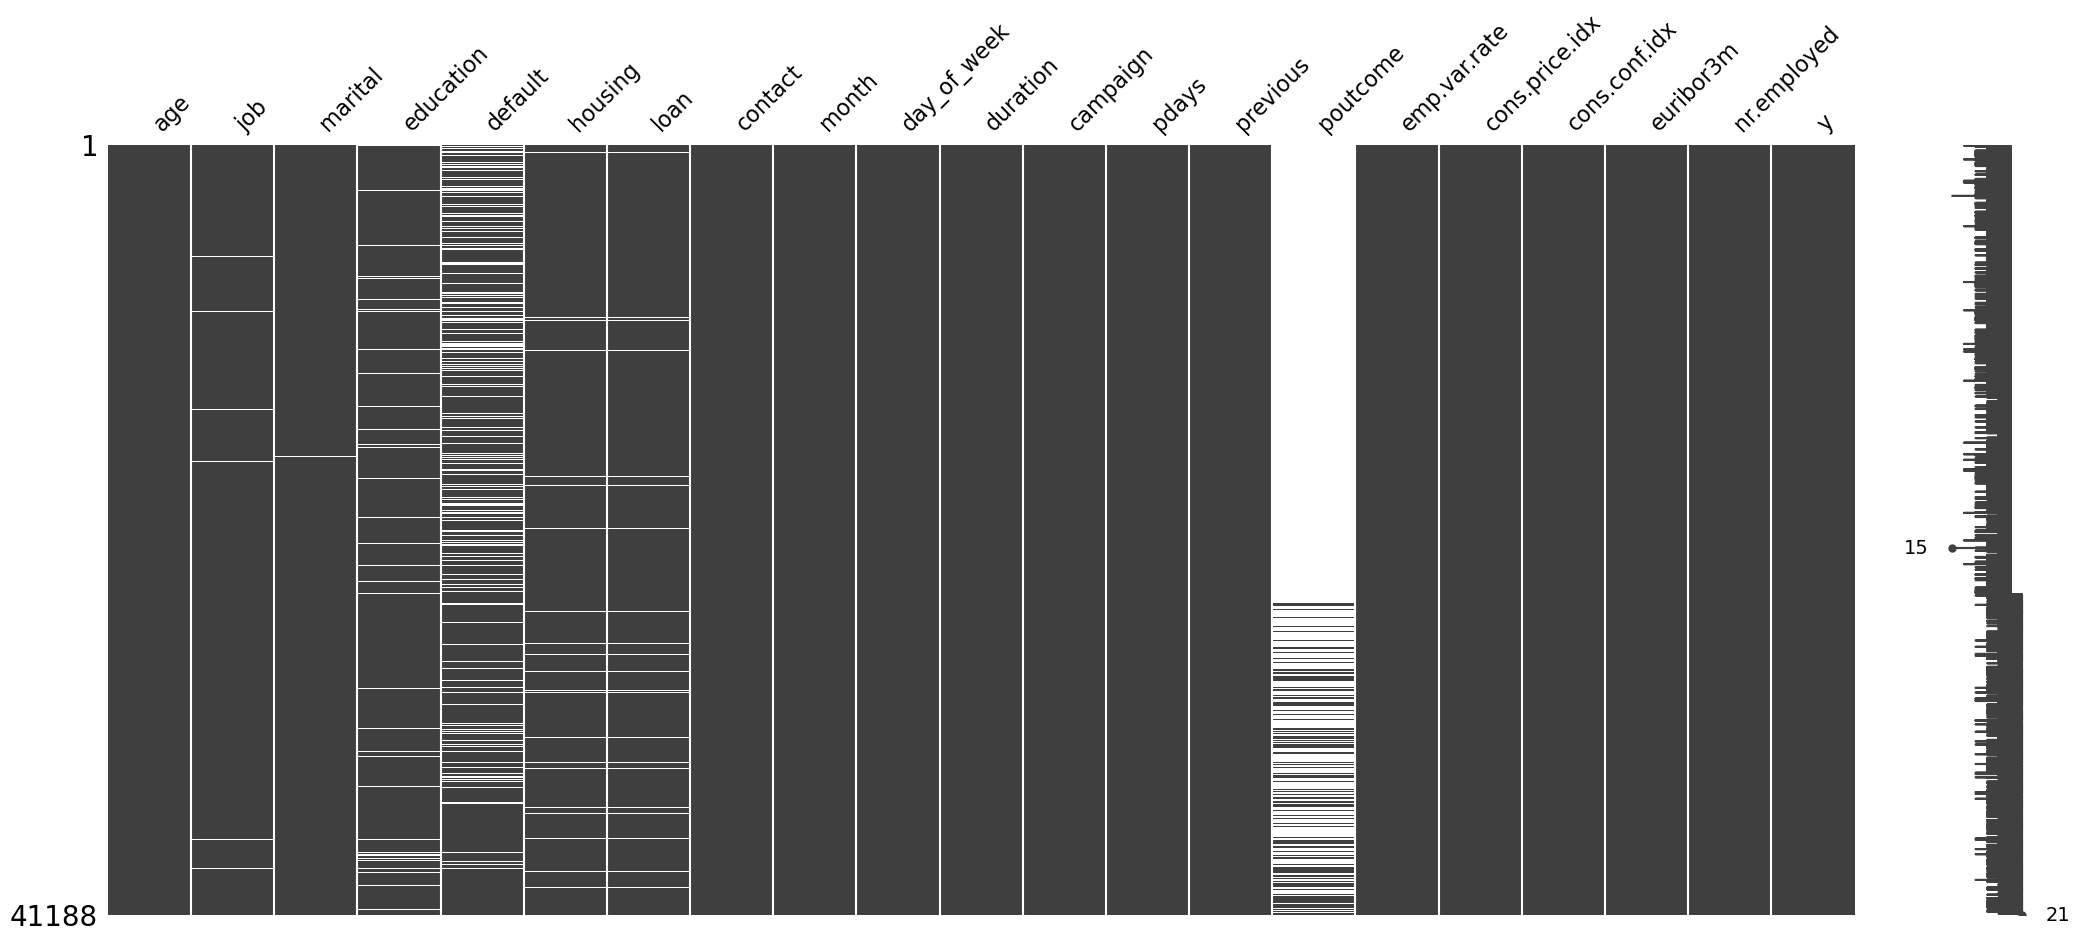

In [19]:
missingno.matrix(new)

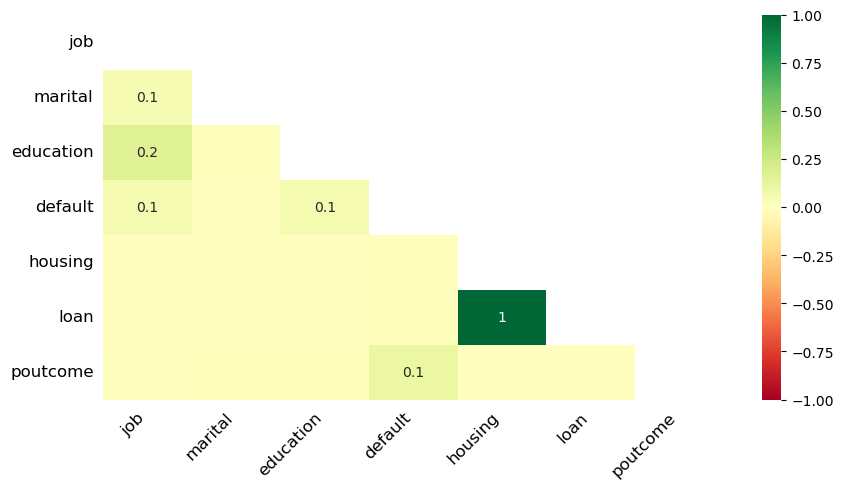

In [20]:
missingno.heatmap(new, cmap="RdYlGn", figsize=(10,5), fontsize=12);

In [26]:
new['default'].isna().sum()#/len(new)*100

8597

In [25]:
len(new[new['default']=='yes'])#/len(new)*100

3

kan emang dikit yang default, minor category = sangat sedikit - modeling bisa dihapus (hanya modeling ya) -> model complexity lebih sedikit
tapi bisa jadi limitasi model karena tidak include yes : input hanya no, unknown -> bisa dibilang outlier

In [27]:
len(new[new['default']=='no'])#/len(new)*100

32588

In [28]:
new[new['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,NaN,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,NaN,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [53]:
printcsv = new[new.isna().any(axis=1)]

In [54]:
printcsv.to_csv('cek.csv')

## Business Problem Understanding

**Context**  
Bank marketing campaigns dataset analysis - Opening a Term Deposit dataset is a dataset describing a Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.

If after all marketing efforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Target y (term): 

* 0 : no, disagree to place deposit
* 1 : yes, agree to place deposit

**Problem Statement :**

Proses marketing dapat memakan waktu dan sumber daya yang signifikan jika bank menargetkan semua calon client tanpa melakukan penyaringan terlebih dahulu atau targeted marketing, maka terdapat waktu dan sumber daya yang terbuang. Bank ingin meningkatkan efisiensi marketing dengan mengetahui calon client mana yang kemungkinan akan setuju untuk membuka akun tabungan berjangka (term deposit) atau deposito.

**Goals :**

Berdasarkan permasalahan tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang client akan setuju untuk membuka akun tabungan berjangka atau deposito. Hal ini dapat mendukung pihak bank untuk menjalankan strategi marketing untuk client yang paling mungkin untuk tertarik agar dapat menghemat biaya, waktu, dan sumber daya.

Selain itu, bank ingin mengetahui faktor apa yang membuat seorang client ingin membuka tabungan berjangka atau deposito atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati potensial client.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan client yang mau membuka akun tabungan berjangka atau tidak. 

Kemudian model klasifikasi akan dikembangkan untuk membantu bank agar dapat memprediksi probabilitas seorang client akan atau ingin membuka akun tabungan berjangka atau deposito di bank tersebut atau tidak.

**Metric Evaluation**

<img src='Matrix.png'>

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya perekrutan, waktu dan sumber daya

Type 2 error : False Negative  
Konsekuensi: kehilangan calon potensial 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost perekrutan dari perusahaan tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup kandidat potensial yang dibutuhkan perusahaan. Jadi harus kita seimbangkan nanti antara precision dan recallnya dari kelas positive (kandidat potensial). Jadi nanti metric utama yang bisa digunakan adalah F1-Score atau Precision-Recall Curves. 

Tapi untuk kali ini yang digunakan di project ini adalah roc_auc (walau sebenarnya ini bisa kurang akurat untuk imbalanced data). (PENTING! => tolong kalian pelajari lebih lanjut mengenai masing-masing evaluation metrics)